# 7.
Uma mola exerce uma força 𝐹$_𝑥$=−𝑘 𝑥(𝑡), em que  𝑘 é a constante elástica da mola, num corpo de massa 𝑚. Considere 𝑘=1 N/m e 𝑚=1 kg.


a) Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 4 m.


C:\Users\joseg\AppData\Local\Temp/ipykernel_296/175322982.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n=np.int(tf/dt+0.1)


1000


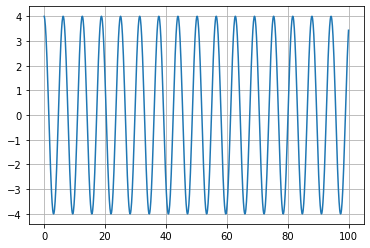

In [1]:
import numpy as np
import matplotlib.pyplot as plt


dt=0.1
tf=100.00
n=np.int(tf/dt+0.1)

t=np.linspace(0,tf,n)

print(n)

x=np.empty(n)
v=np.empty(n)
x0=4
v0=0
x[0]=x0
v[0]=v0

k=1
m=1
w2=k/m

for i in range (0,n-1):
	a=-w2*x[i]
	v[i+1]=v[i]+a*dt
	x[i+1]=x[i]+v[i+1]*dt #euler-cromer


plt.figure()
plt.plot(t,x)
# plt.plot(t,energia,label='W Res')
# plt.ylabel('x(m)')
# plt.xlabel( 't (s)' )
plt.grid()

plt.show()


b) Calcule a amplitude do movimento e o seu período, usando os resultados numéricos.

Amplitude:  4.000000500000028
Periodo:  6.283247877674595


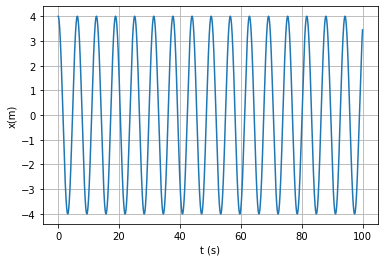

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def max_numen(x0, x1, x2, y0, y1, y2):
    qo1 = (x0-x1)*(x0-x2)   
    qo2 = (x1-x0)*(x1-x2)
    qo3 = (x2-x0)*(x2-x1)
    a_0 = y0/ qo1
    b_0 = y1/ qo2    
    c_0 = y2/ qo3
    
    a = ((x2+x1)*y0)/qo1
    b = ((x2+x0)*y1)/qo2
    c = ((x0+x1)*y2)/qo3
    
    xmax = (a_0+b_0+c_0)/(a+b+c)*0.5
    
    xta=xmax-x0
    xtb=xmax-x1
    xtc=xmax-x2

    ymax=a_0*xtb*xtc+b_0*xta*xtc+c_0*xta*xtb
    return xmax, ymax

def maximo(xm1,xm2,xm3,ym1,ym2,ym3):  # máximo pelo polinómio de Lagrange
    xab=xm1-xm2
    xac=xm1-xm3
    xbc=xm2-xm3

    a=ym1/(xab*xac)
    b=-ym2/(xab*xbc)
    c=ym3/(xac*xbc)

    xmla=(b+c)*xm1+(a+c)*xm2+(a+b)*xm3
    xmax=0.5*xmla/(a+b+c)

    xta=xmax-xm1
    xtb=xmax-xm2
    xtc=xmax-xm3

    ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
    return xmax, ymax

def zerosv(xm1,xm2,xm3,ym1,ym2,ym3):  # raiz pelo polinómio de Lagrange
    xab=xm1-xm2
    xac=xm1-xm3
    xbc=xm2-xm3

    a=ym1/(xab*xac)
    b=-ym2/(xab*xbc)
    c=ym3/(xac*xbc)

    am=a+b+c
    bm=a*(xm2+xm3)+b*(xm1+xm3)+c*(xm1+xm2)
    cm=a*xm2*xm3+b*xm1*xm3+c*xm1*xm2

    xzero=(bm+np.sqrt(bm*bm-4*am*cm))/(2*am)
    if xm3 > xm1 and (xzero < xm1 or xzero > xm3): 
        xzero=(bm-np.sqrt(bm*bm-4*am*cm))/(2*am)


    if xm1 > xm3 and (xzero < xm3 or xzero > xm1):
        xzero=(bm-np.sqrt(bm*bm-4*am*cm))/(2*am)

    xta=xzero-xm1
    xtb=xzero-xm2
    xtc=xzero-xm3
    yzero=a*xtb*xtc+b*xta*xtc+c*xta*xtb
    return xzero, yzero


dt=0.001
tf=100.00
n=np.int(tf/dt+0.1)

t=np.linspace(0,tf,n)

x=np.empty(n);
v=np.empty(n);
x0=4
v0=0
x[0]=x0
v[0]=v0

k=1
m=1
w2=k/m

countMaximos=0
maxTotal=0
temposMax=[]
maximos=[]

for i in range (0,n-1):
    a=-w2*x[i]
    v[i+1]=v[i]+a*dt
    x[i+1]=x[i]+v[i+1]*dt #euler-cromer

    if i>1 and x[i-1] < x[i] and  x[i+1] < x[i]  :    # para máximo
            # print('sucess',i, y[i-1], y[i], y[i+1])
        maxt, maxx=maximo(t[i-1], t[i], t[i+1], x[i-1], x[i], x[i+1])
        maximos.append(maxx)
        temposMax.append(maxt)

countMaximos=len(maximos)
Amplitude=sum(maximos)/countMaximos #media
print("Amplitude: ",Amplitude)

sumTempos=0

#calculo do periodo
for j in range(0,countMaximos-1):
    sumTempos+=temposMax[j+1]-temposMax[j]

Periodo=sumTempos/(countMaximos-1) #Faz a media

print("Periodo: ",Periodo)


plt.figure()
plt.plot(t,x)

plt.ylabel('x(m)')
plt.xlabel( 't (s)' )
plt.grid()

plt.show()


c) Calcule a energia mecânica. É constante ao longo do tempo?


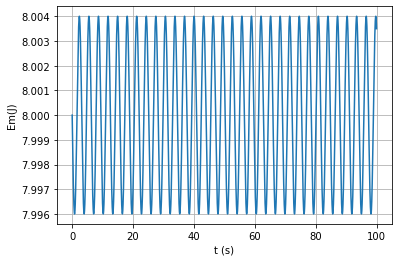

In [3]:
dt=0.001
tf=100.00
n=np.int(tf/dt+0.1)

t=np.linspace(0,tf,n)

x=np.empty(n);
v=np.empty(n);
em=np.empty(n);
x0=4
v0=0
x[0]=x0
v[0]=v0

k=1
m=1
w2=k/m

countMaximos=0
maxTotal=0
difTempos=[]
maximos=[]


for i in range (0,n-1):
	a=-w2*x[i]
	v[i+1]=v[i]+a*dt
	x[i+1]=x[i]+v[i+1]*dt #euler-cromer
	em[i]=0.5*k*x[i]**2+0.5*m*v[i]**2



#calcular o ultimo ponto
em[n-1]=0.5*k*x[n-1]**2+0.5*m*v[n-1]**2


plt.figure()
plt.plot(t,em)

plt.ylabel('Em(J)')
plt.xlabel( 't (s)' )
plt.grid()

plt.show()


d) Qual o método de integração da equação diferencial usou?


Método de Euler-Cromer

O método de Euler produz uma solução para a lei do movimento satisfatória
(aproximadamente sinusoidal) mas a energia mecânica não se mantêm constante, nem
aproximadamente, antes, pelo contrário, explode.
Se usarmos o método de Euler-Cromer, a lei do movimento obtida é sinusoidal e a energia mecânica mantêm-se, em média
constante, com pequenos desvios

Cromer provou que erro de truncatura do método de Euler-Cromer é nulo ao fim de
um período. A solução obtida da lei do movimento possui exatidão nas amplitudes
máxima e mínima, e a anergia mecânica volta ao seu valor nos múltiplos do período.
Para outros posições, a energia mecânica apresenta pequenos desvios ao seu valor.
A conservação da energia total é um bom teste aos métodos de integração
numérica. O método de Euler é muito mau, enquanto que o método de Euler-Cromer é
muito eficiente no cálculo da energia mecânica, para o mesmo número de operações.
Devemos escolher os métodos que melhor conservam a energia mecânica,
quando só existem forças conservativas.

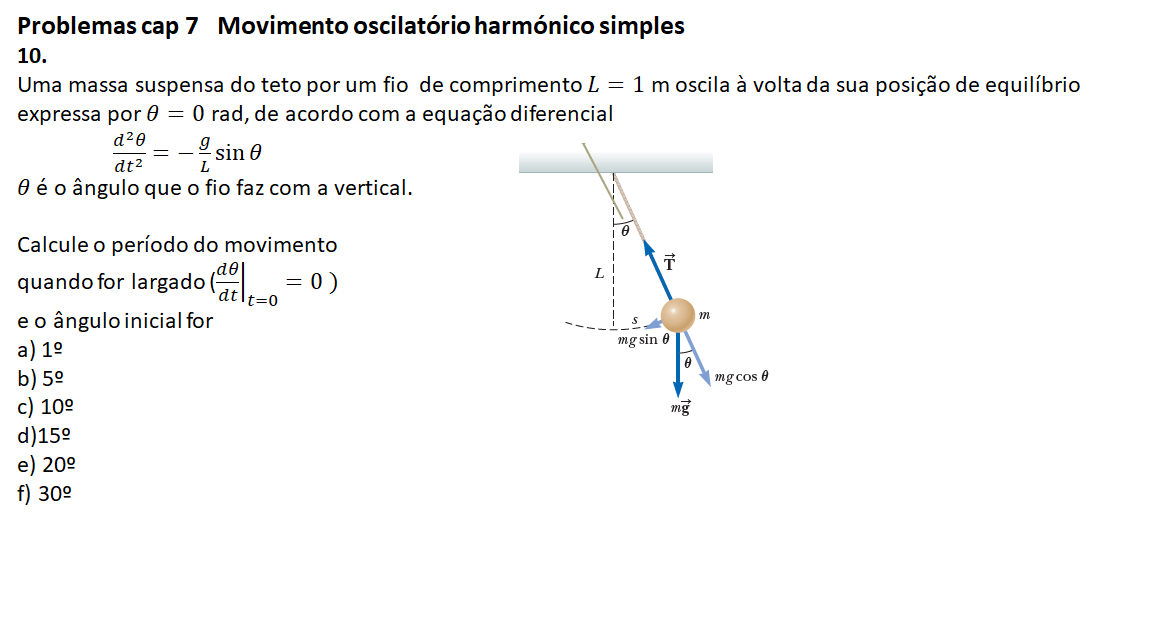

1.0
Amplitude:  0.5235993880987092
Periodo:  2.0421323299023406
Periodo Analitico para pequenas oscilações:  2.007089923154493


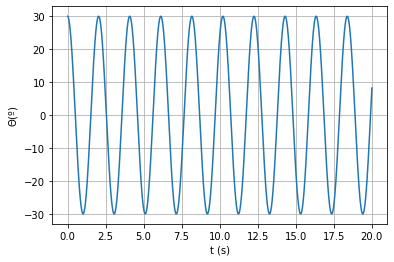

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math


def maximo(xm1,xm2,xm3,ym1,ym2,ym3):  # máximo pelo polinómio de Lagrange
    xab=xm1-xm2
    xac=xm1-xm3
    xbc=xm2-xm3

    a=ym1/(xab*xac)
    b=-ym2/(xab*xbc)
    c=ym3/(xac*xbc)

    xmla=(b+c)*xm1+(a+c)*xm2+(a+b)*xm3
    xmax=0.5*xmla/(a+b+c)

    xta=xmax-xm1
    xtb=xmax-xm2
    xtc=xmax-xm3

    ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
    return xmax, ymax

def zerosv(xm1,xm2,xm3,ym1,ym2,ym3):  # raiz pelo polinómio de Lagrange
    xab=xm1-xm2
    xac=xm1-xm3
    xbc=xm2-xm3

    a=ym1/(xab*xac)
    b=-ym2/(xab*xbc)
    c=ym3/(xac*xbc)

    am=a+b+c
    bm=a*(xm2+xm3)+b*(xm1+xm3)+c*(xm1+xm2)
    cm=a*xm2*xm3+b*xm1*xm3+c*xm1*xm2

    xzero=(bm+np.sqrt(bm*bm-4*am*cm))/(2*am)
    if xm3 > xm1 and (xzero < xm1 or xzero > xm3): 
        xzero=(bm-np.sqrt(bm*bm-4*am*cm))/(2*am)


    if xm1 > xm3 and (xzero < xm3 or xzero > xm1):
        xzero=(bm-np.sqrt(bm*bm-4*am*cm))/(2*am)

    xta=xzero-xm1
    xtb=xzero-xm2
    xtc=xzero-xm3
    yzero=a*xtb*xtc+b*xta*xtc+c*xta*xtb
    return xzero, yzero
    
dt=0.001
tf=20.00
n=np.int(tf/dt+0.1)

t=np.linspace(0,tf,n)

teta=np.empty(n);
omega=np.empty(n);
acelAngular=np.empty(n);


teta0graus=30 #1 



teta0=math.radians(teta0graus)
omega0=0
teta[0]=teta0
omega[0]=omega0

L=1
g=9.8


countMaximos=0
maxTotal=0
difTempos=[]
maximos=[]


for i in range (0,n-1):
	acelAngular[i]=-(g/L)*math.sin(teta[i]);
	omega[i+1]=omega[i]+acelAngular[i]*dt
	teta[i+1]=teta[i]+omega[i+1]*dt #euler-cromer
	
	if i>1 and teta[i-1] < teta[i] and  teta[i+1] < teta[i]  :    # para máximo
        # print('sucess',i, y[i-1], y[i], y[i+1])
		maxt, maxx=maximo(t[i-1], t[i], t[i+1], teta[i-1], teta[i], teta[i+1])
		maximos.append(maxx)
		difTempos.append(maxt)

print(math.sin(math.radians(90)))
countMaximos=len(maximos)		
Amplitude=sum(maximos)/countMaximos #media
print("Amplitude: ",Amplitude)

sumTempos=0

# #calculo do periodo
for j in range(0,countMaximos-1):
	sumTempos+=difTempos[j+1]-difTempos[j]

Periodo=sumTempos/(countMaximos-1) #Faz a media

print("Periodo: ",Periodo)
print("Periodo Analitico para pequenas oscilações: ",2*math.pi*math.sqrt(L/g))


plt.figure()
plt.plot(t,np.degrees(teta))
# plt.plot(t,energia,label='W Res')
plt.ylabel('$\Theta$(º)')
plt.xlabel( 't (s)' )
plt.grid()

plt.show()

# 12

a) Faça o diagrama de energia desta energia potencial. Qual o movimento quando a energia total for menor que 1 J? 

40000


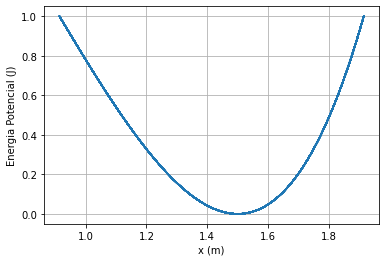

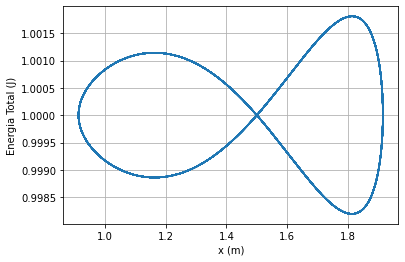

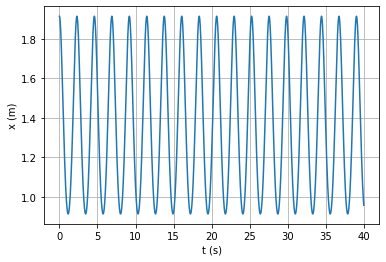

In [1]:
import numpy as np
import matplotlib.pyplot as plt


dt=0.001
tf=40.00
n=np.int(tf/dt+0.1)

t=np.linspace(0,tf,n)

print(n)

x=np.empty(n);
v=np.empty(n);
ep=np.empty(n);
et=np.empty(n);


k=1
m=1
w2=k/m
Xeq=1.5

#condicoes iniciais
ep0=1

x0=np.sqrt(Xeq**2+np.sqrt(ep0*2/k))
v0=0
x[0]=x0
v[0]=v0



for i in range (0,n-1):
	a=-2*w2*(x[i]**2-Xeq**2)*x[i]
	v[i+1]=v[i]+a*dt
	x[i+1]=x[i]+v[i+1]*dt #euler-cromer
	ep[i]=0.5*k*(x[i]**2-Xeq**2)**2
	et[i]=ep[i]+0.5*m*v[i]**2
    
# print(np.diff(t[np.round(ep,4)== 0]))
# print(t[np.round(ep,5)== 0])
#ultimo ponto
ep[n-1]=0.5*k*(x[n-1]**2-Xeq**2)**2
et[n-1]=ep[n-1]+0.5*m*v[n-1]**2
# print(ep[n-1])
# print(et[n-1])
plt.figure()
plt.plot(x,ep)
plt.ylabel('Energia Potencial (J)')
plt.xlabel( 'x (m)' )
plt.grid()

plt.show()


plt.figure()
plt.plot(x,et)
plt.ylabel('Energia Total (J)')
plt.xlabel( 'x (m)' )
# plt.ylim(0,10)
plt.grid()

plt.figure()
plt.plot(t,x)
plt.ylabel('x (m)')
plt.xlabel( 't (s)' )
# plt.ylim(0,10)
plt.grid()


b) Calcule a lei do movimento, quando a energia total for 0.75 J. Qual a amplitude e a frequência do movimento?

40000
Amplitude:  1.8640673269047938
Periodo:  2.2346438975445264 s
Frequência:  0.44749859299677275 hz


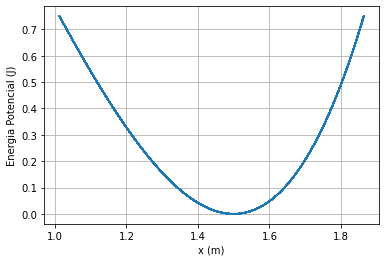

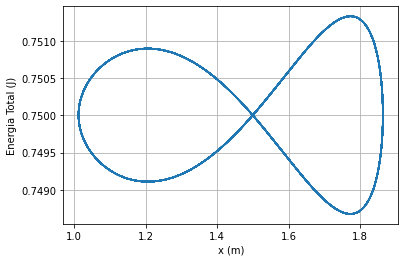

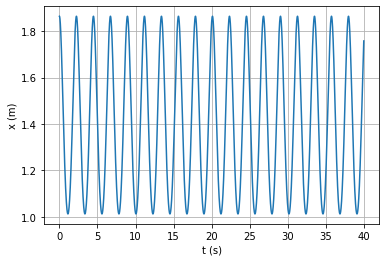

In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt

def maximo(xm1,xm2,xm3,ym1,ym2,ym3):  # máximo pelo polinómio de Lagrange
    xab=xm1-xm2
    xac=xm1-xm3
    xbc=xm2-xm3

    a=ym1/(xab*xac)
    b=-ym2/(xab*xbc)
    c=ym3/(xac*xbc)

    xmla=(b+c)*xm1+(a+c)*xm2+(a+b)*xm3
    xmax=0.5*xmla/(a+b+c)

    xta=xmax-xm1
    xtb=xmax-xm2
    xtc=xmax-xm3

    ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
    return xmax, ymax


dt=0.001
tf=40.00
n=np.int(tf/dt+0.1)

t=np.linspace(0,tf,n)

print(n)

x=np.empty(n);
v=np.empty(n);
ep=np.empty(n);
et=np.empty(n);


k=1
m=1
w2=k/m
Xeq=1.5

#condicoes iniciais
ep0=0.75

x0=np.sqrt(Xeq**2+np.sqrt(ep0*2/k))
v0=0
x[0]=x0
v[0]=v0


countMaximos=0
maxTotal=0
difTempos=[]
maximos=[]

for i in range (0,n-1):
    a=-2*w2*(x[i]**2-Xeq**2)*x[i]
    v[i+1]=v[i]+a*dt
    x[i+1]=x[i]+v[i+1]*dt #euler-cromer
    ep[i]=0.5*k*(x[i]**2-Xeq**2)**2
    et[i]=ep[i]+0.5*m*v[i]**2
    
    if i>1 and x[i-1] < x[i] and  x[i+1] < x[i]  :    # para máximo
        # print('sucess',i, y[i-1], y[i], y[i+1])
        maxt, maxx=maximo(t[i-1], t[i], t[i+1], x[i-1], x[i], x[i+1])
        maximos.append(maxx)
        difTempos.append(maxt)

# print(math.sin(math.radians(90)))
countMaximos=len(maximos)
Amplitude=sum(maximos)/countMaximos #media
print("Amplitude: ",Amplitude)

sumTempos=0

# #calculo do periodo
for j in range(0,countMaximos-1):
	sumTempos+=difTempos[j+1]-difTempos[j]

Periodo=sumTempos/(countMaximos-1) #Faz a media

print("Periodo: ",Periodo, "s")
print("Frequência: ",1/Periodo, "hz")


    
# print(np.diff(t[np.round(ep,4)== 0]))
# print(t[np.round(ep,5)== 0])
#ultimo ponto
ep[n-1]=0.5*k*(x[n-1]**2-Xeq**2)**2
et[n-1]=ep[n-1]+0.5*m*v[n-1]**2

plt.figure()
plt.plot(x,ep)
plt.ylabel('Energia Potencial (J)')
plt.xlabel( 'x (m)' )
plt.grid()



plt.figure()
plt.plot(x,et)
plt.ylabel('Energia Total (J)')
plt.xlabel( 'x (m)' )
# plt.ylim(0,10)
plt.grid()


plt.figure()
plt.plot(t,x)
plt.ylabel('x (m)')
plt.xlabel( 't (s)' )
# plt.ylim(0,10)
plt.grid()



c) Calcule a lei do movimento quando a energia total for 3.0 J? Qual a amplitude e a frequência do movimento?

40000
Amplitude:  2.1678319811461244
Periodo:  5.43522045155186 s
Frequência:  0.1839851775863996 hz


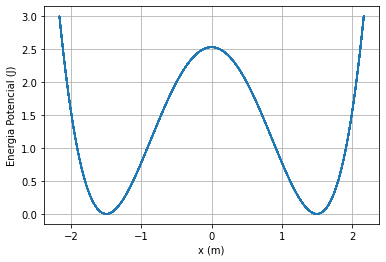

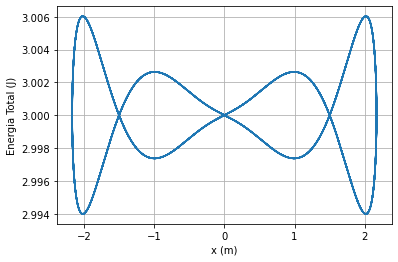

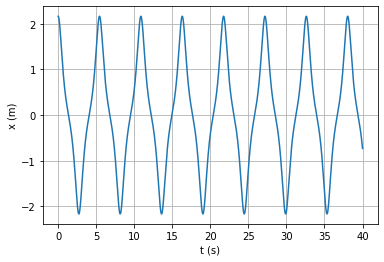

In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt

def maximo(xm1,xm2,xm3,ym1,ym2,ym3):  # máximo pelo polinómio de Lagrange
    xab=xm1-xm2
    xac=xm1-xm3
    xbc=xm2-xm3

    a=ym1/(xab*xac)
    b=-ym2/(xab*xbc)
    c=ym3/(xac*xbc)

    xmla=(b+c)*xm1+(a+c)*xm2+(a+b)*xm3
    xmax=0.5*xmla/(a+b+c)

    xta=xmax-xm1
    xtb=xmax-xm2
    xtc=xmax-xm3

    ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
    return xmax, ymax


dt=0.001
tf=40.00
n=np.int(tf/dt+0.1)

t=np.linspace(0,tf,n)

print(n)

x=np.empty(n);
v=np.empty(n);
ep=np.empty(n);
et=np.empty(n);


k=1
m=1
w2=k/m
Xeq=1.5

#condicoes iniciais
ep0=3

x0=np.sqrt(Xeq**2+np.sqrt(ep0*2/k))
v0=0
x[0]=x0
v[0]=v0


countMaximos=0
maxTotal=0
difTempos=[]
maximos=[]

for i in range (0,n-1):
    a=-2*w2*(x[i]**2-Xeq**2)*x[i]
    v[i+1]=v[i]+a*dt
    x[i+1]=x[i]+v[i+1]*dt #euler-cromer
    ep[i]=0.5*k*(x[i]**2-Xeq**2)**2
    et[i]=ep[i]+0.5*m*v[i]**2
    
    if i>1 and x[i-1] < x[i] and  x[i+1] < x[i]  :    # para máximo
        # print('sucess',i, y[i-1], y[i], y[i+1])
        maxt, maxx=maximo(t[i-1], t[i], t[i+1], x[i-1], x[i], x[i+1])
        maximos.append(maxx)
        difTempos.append(maxt)

# print(math.sin(math.radians(90)))
countMaximos=len(maximos)
Amplitude=sum(maximos)/countMaximos #media
print("Amplitude: ",Amplitude)

sumTempos=0

# #calculo do periodo
for j in range(0,countMaximos-1):
	sumTempos+=difTempos[j+1]-difTempos[j]

Periodo=sumTempos/(countMaximos-1) #Faz a media

print("Periodo: ",Periodo, "s")
print("Frequência: ",1/Periodo, "hz")


    
# print(np.diff(t[np.round(ep,4)== 0]))
# print(t[np.round(ep,5)== 0])
#ultimo ponto
ep[n-1]=0.5*k*(x[n-1]**2-Xeq**2)**2
et[n-1]=ep[n-1]+0.5*m*v[n-1]**2

plt.figure()
plt.plot(x,ep)
plt.ylabel('Energia Potencial (J)')
plt.xlabel( 'x (m)' )
plt.grid()



plt.figure()
plt.plot(x,et)
plt.ylabel('Energia Total (J)')
plt.xlabel( 'x (m)' )
# plt.ylim(0,10)
plt.grid()


plt.figure()
plt.plot(t,x)
plt.ylabel('x (m)')
plt.xlabel( 't (s)' )
# plt.ylim(0,10)
plt.grid()
